In [2]:
#import pandas as pd 

In [3]:
import os 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
from dotenv import load_dotenv

load_dotenv() 

True

In [4]:
connection = mysql.connector.connect(host='localhost',
                                      user='root',
                                      password='1723',
                                      database='swiftmarket')

In [77]:
host = os.getenv('HOST')
username = os.getenv('USER')
password = os.getenv('PASSWORD')

host = os.getenv('HOST')
username = os.getenv('USER')
password = os.getenv('1723')

In [6]:
connection.is_connected()

True

In [7]:
connection = mysql.connector.connect(host=host,
                                     user=username,
                                     password=password,
                                     database='swiftmarket')

cursor = connection.cursor()

In [8]:
query = """show tables;"""
cursor.execute(query)

In [9]:
cursor.fetchall()

[('categories',),
 ('customers',),
 ('employees',),
 ('salesdata',),
 ('subcategories',),
 ('suppliers',)]

In [10]:
rows = cursor.fetchall()
rows

[]

In [11]:
query = """select * from salesdata limit 5;"""
cursor.execute(query)

In [12]:
rows = cursor.fetchall()
for row in rows:
    print(row)


(23000, 'C-2023-100-12', 6002, 1100, datetime.date(2023, 5, 2), 2, Decimal('176432.00'))
(23001, 'C-2023-100-141', 6029, 1115, datetime.date(2023, 12, 26), 2, Decimal('47172.00'))
(23002, 'C-2023-100-86', 6029, 1035, datetime.date(2023, 3, 26), 2, Decimal('47172.00'))
(23003, 'C-2023-100-72', 6006, 1016, datetime.date(2023, 8, 1), 2, Decimal('117644.00'))
(23004, 'C-2023-100-142', 6030, 1067, datetime.date(2023, 3, 6), 5, Decimal('336560.00'))


In [13]:
cursor.column_names

('SaleID',
 'CustomerID',
 'SubcatID',
 'EmployeeID',
 'SaleDate',
 'Quantity',
 'TotalPrice')

In [14]:
pd.DataFrame(data=rows,columns=cursor.column_names)

,SaleID,CustomerID,SubcatID,EmployeeID,SaleDate,Quantity,TotalPrice
0,23000,C-2023-100-12,6002,1100,2023-05-02,2,176432.00
1,23001,C-2023-100-141,6029,1115,2023-12-26,2,47172.00
2,23002,C-2023-100-86,6029,1035,2023-03-26,2,47172.00
3,23003,C-2023-100-72,6006,1016,2023-08-01,2,117644.00
4,23004,C-2023-100-142,6030,1067,2023-03-06,5,336560.00


In [78]:
#fetch firstname annd email 

In [16]:
query = """describe Customers;"""
cursor.execute(query)
rows = cursor.fetchall()


In [17]:
for row in rows:
    print(row)


('CustomerID', 'varchar(50)', 'NO', 'PRI', None, '')
('FirstName', 'varchar(50)', 'YES', '', None, '')
('LastName', 'varchar(50)', 'YES', '', None, '')
('Email', 'varchar(100)', 'YES', '', None, '')
('Phone', 'varchar(20)', 'YES', '', None, '')
('Address', 'varchar(255)', 'YES', '', None, '')
('State', 'varchar(100)', 'YES', '', None, '')


In [81]:
cursor.column_names

('customerid', 'firstname', 'email')

In [79]:
query = """select customerid,firstname,email
from customers;"""
cursor.execute(query)
rows = cursor.fetchall()
df = pd.DataFrame(data=rows,columns=cursor.column_names)
df.head()

,customerid,firstname,email
0,C-2023-100-1,Mahika,MahikaSunder_11@zmail.com
1,C-2023-100-10,Zeeshan,ZeeshanVasa_1@zmail.com
2,C-2023-100-100,Aaina,AainaSachdeva_9@zmail.com
3,C-2023-100-101,Shray,ShrayBajwa_11@zmail.com
4,C-2023-100-102,Navya,NavyaDash_5@zmail.com


In [80]:
def queryToDataFrame (query):

    cursor.execute(query)
    rows = cursor.fetchall()
    df = pd.DataFrame(data=rows,columns=cursor.column_names)
    return df


In [21]:
query = """select customerid,firstname,email
from customers;"""
df = queryToDataFrame(query)

In [22]:
df.head()

,customerid,firstname,email
0,C-2023-100-1,Mahika,MahikaSunder_11@zmail.com
1,C-2023-100-10,Zeeshan,ZeeshanVasa_1@zmail.com
2,C-2023-100-100,Aaina,AainaSachdeva_9@zmail.com
3,C-2023-100-101,Shray,ShrayBajwa_11@zmail.com
4,C-2023-100-102,Navya,NavyaDash_5@zmail.com


In [23]:
query = """SELECT c.categoryname,sum(s.totalprice) as TotalSales
from salesdata s 
inner join subcategories sb 
on s.subcatid = sb.subcatid
inner join categories c
on sb.categoryid = c.categoryid
group by c.categoryname;"""

df = queryToDataFrame(query)

In [24]:
df.head()

,categoryname,TotalSales
0,Electronics and Gadgets,319374417.00
1,Home and Kitchen Appliances,269316684.00
2,Outdoor and Sports Equipment,231074739.00
3,Health and Wellness Products,324761329.00
4,Books and Educational Materials,282897933.00


In [25]:
x_val = df['categoryname'].values

In [26]:
df['TotalSales'] = df['TotalSales'].astype(float)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   categoryname  6 non-null      object 
 1   TotalSales    6 non-null      float64
dtypes: float64(1), object(1)
memory usage: 228.0+ bytes


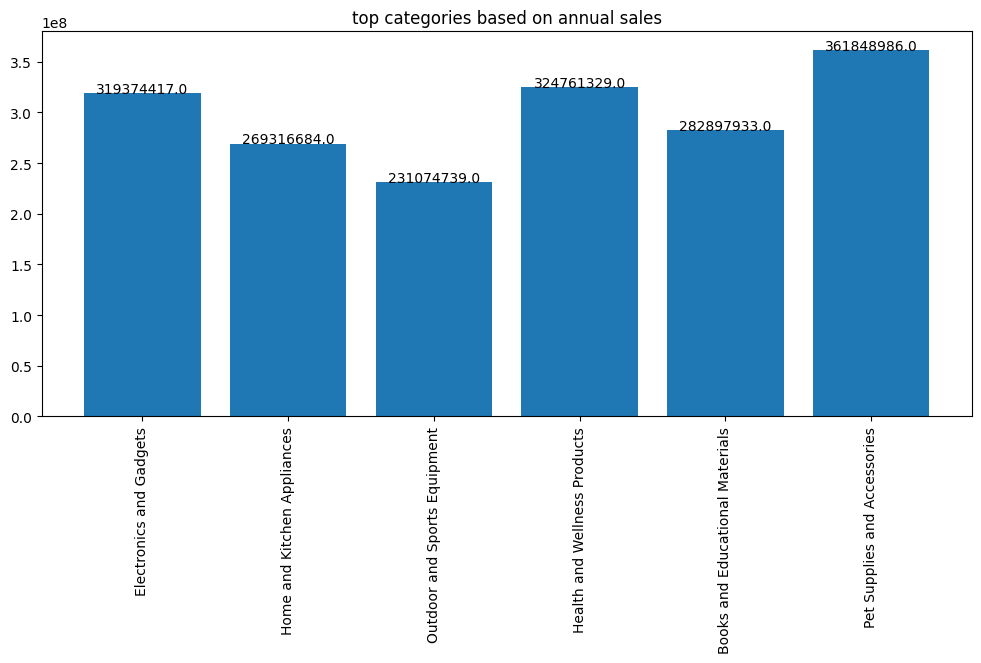

In [28]:
plt.figure(figsize=(12,5))
plt.title('top categories based on annual sales')
plt.bar(df['categoryname'].values,height=df['TotalSales'].values)


for i in range(len(df['categoryname'])):
    plt.annotate(xy=(i,df['TotalSales'].values[i]),
                 text = df['TotalSales'].values[i],
                 horizontalalignment='center')

plt.xticks(rotation=90)
plt.savefig('annualsales-categories.jpeg')
plt.show()


1 Provide a visual representation of our annual sales performance over time?

In [29]:
query = """SELECT monthname(saledate) as month , SUM(TotalPrice) AS total_sales
FROM salesdata
GROUP BY monthname(saledate),month(saledate)
ORDER BY  month(saledate) asc ;"""
df = queryToDataFrame(query)

In [30]:
df.head()

,month,total_sales
0,January,155340130.00
1,February,140345189.00
2,March,151612551.00
3,April,150691604.00
4,May,163734120.00


In [31]:
x_val = df['month'].values

In [32]:
y_val = df['total_sales'].values

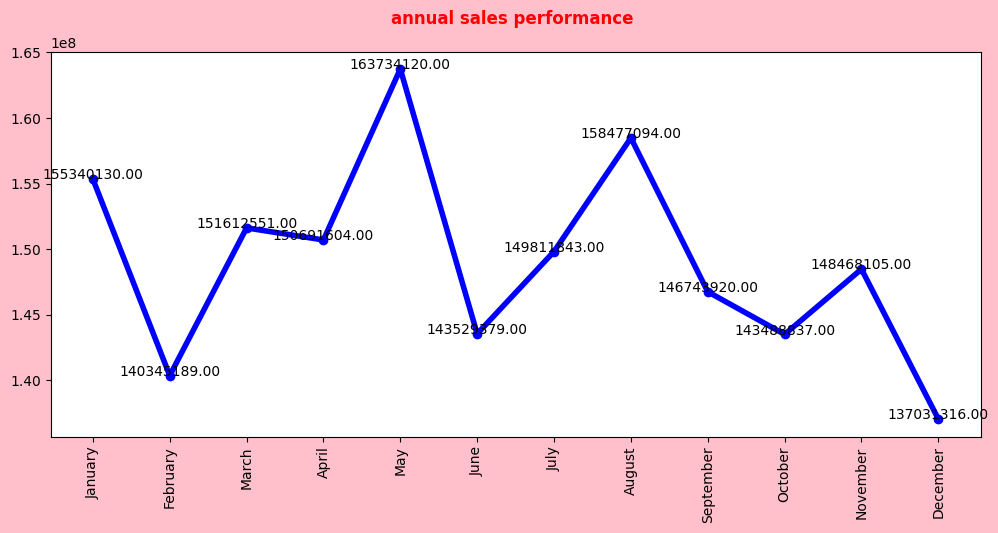

In [33]:
plt.figure(figsize=(12,5),facecolor='pink')
plt.title('annual sales performance ',color= 'red',pad=20,fontweight='bold')
plt.plot(x_val,y_val,
         linestyle='solid',
       linewidth=4,
        color='blue',marker='o')


for i in range(len(df['month'])):
    plt.annotate(xy=(i,df['total_sales'].values[i]),
                 text = df['total_sales'].values[i],
                 horizontalalignment='center')
    

#plt.legend
plt.xticks(rotation=90)
plt.show()

#2. The client is interested in understanding how the sales have been fluctuating
over time to identify any underlying patterns or anomalies Analyze the trend in
our monthly sales using a moving average technique 

#3 Explore the month-over-month growth rate in sales.

#4 identify the top-performing sales representatives based on their total sales volume 


In [34]:
query = """SELECT
    s.employeeid,
    e.firstname,
    SUM(s.totalprice) AS total_sales
FROM
    salesdata s
JOIN
    employees e ON s.employeeid = e.employeeid
GROUP BY
    s.employeeid, e.firstname
ORDER BY
    total_sales DESC
LIMIT 10 ;"""
df = queryToDataFrame(query)

In [35]:
df.head()

,employeeid,firstname,total_sales
0,1115,Yuvaan,20895341.00
1,1017,Tiya,19035834.00
2,1029,Shaan,18649467.00
3,1074,Stuvan,18333919.00
4,1001,Fateh,18231579.00


In [36]:
x_value = df['firstname'].values 

In [37]:
y_value = df['total_sales'].values 

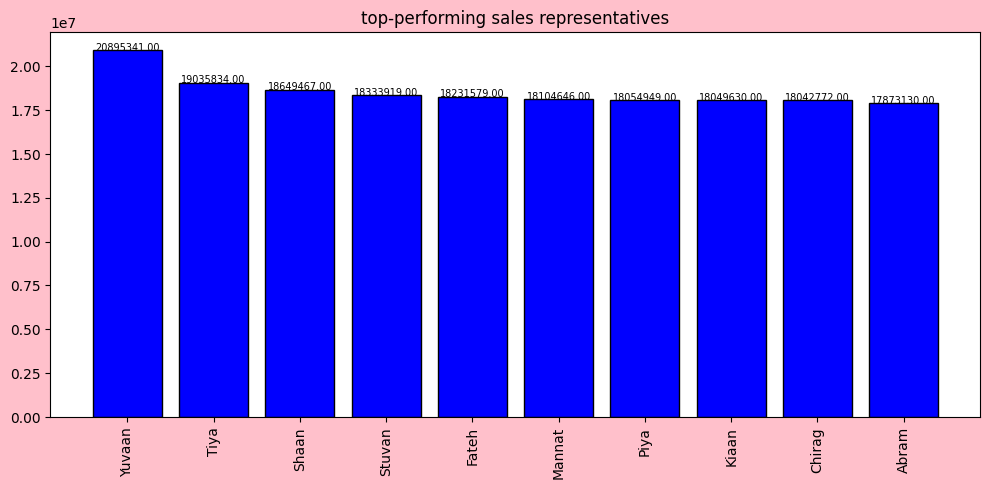

In [38]:

plt.figure(figsize=(12,5),facecolor='pink')
plt.title('top-performing sales representatives')
plt.bar(x_value,height=y_value,color='blue',edgecolor='black')


for i in range(len(df['firstname'])):
    plt.annotate(xy=(i,df['total_sales'].values[i]),
                 text = df['total_sales'].values[i],
                 horizontalalignment='center',size=7)



plt.xticks(rotation=90)
plt.show()

#5. What are the total sales made by each employee?

In [39]:
query = """SELECT
    s.employeeid,
    e.firstname,
    SUM(s.totalprice) AS total_sales
FROM
    salesdata s
JOIN
    employees e ON s.employeeid = e.employeeid
GROUP BY
    s.employeeid, e.firstname
ORDER BY
    total_sales DESC; """

In [40]:
df.head()

,employeeid,firstname,total_sales
0,1115,Yuvaan,20895341.00
1,1017,Tiya,19035834.00
2,1029,Shaan,18649467.00
3,1074,Stuvan,18333919.00
4,1001,Fateh,18231579.00


#6 Which category has the highest total sales?

In [41]:
query = """SELECT c.categoryname, sc.subcatname, SUM(s.TotalPrice) AS total_sales
FROM categories c
JOIN subcategories sc ON c.categoryid = sc.categoryid
JOIN salesdata s ON sc.subcatid = s.subcatid
GROUP BY c.categoryname, sc.subcatname
ORDER BY total_sales DESC;
"""
df = queryToDataFrame(query)

In [42]:
df.head()

,categoryname,subcatname,total_sales
0,Pet Supplies and Accessories,Pet beds,119604888.00
1,Electronics and Gadgets,Laptops,112563616.00
2,Home and Kitchen Appliances,Air fryer,100686176.00
3,Books and Educational Materials,Fiction novels,99827500.00
4,Outdoor and Sports Equipment,Camping stove,95899496.00


In [43]:
x_val1 = df['categoryname'].values

In [44]:
y_val1 = df['total_sales'].values

KeyError: 'categoryname'

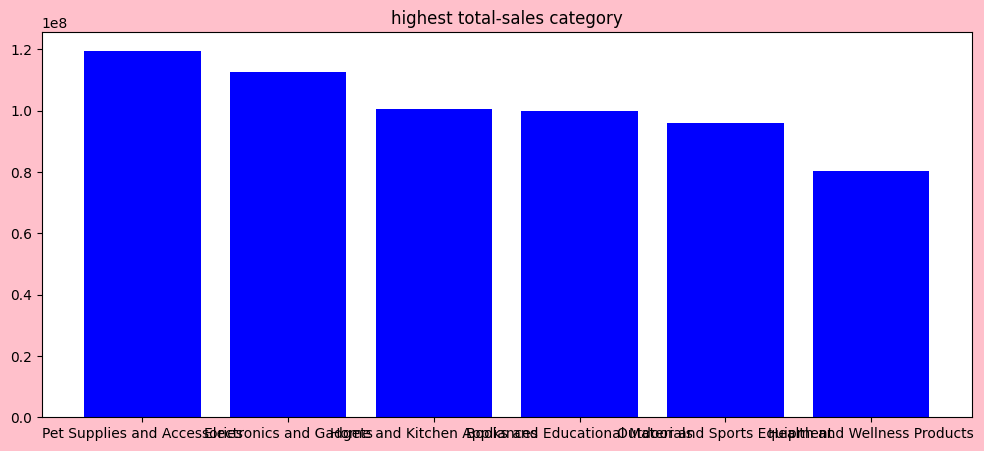

In [82]:

plt.figure(figsize=(12,5),facecolor='pink')
plt.title('highest total-sales category')
plt.bar(x_val1,height=y_val1,color='blue')


for i in range(len(df['categoryname'])):
    plt.annotate(xy=(i,df['total_sales'].values[i]),
                 text = df['total_sales'].values[i],
                 horizontalalignment='center',size=7)



plt.xticks(rotation=90)
plt.show()

#7. How many customers are there in each state?

In [46]:
query = """SELECT state, COUNT(DISTINCT customerid) AS number_customers
FROM customers
GROUP BY state;"""
df = queryToDataFrame(query)

In [47]:
df

,state,number_customers
0,Arunachal Pradesh,11
1,Assam,10
2,Bihar,14
3,Chhattisgarh,10
4,Delhi,6
5,Goa,14
6,Gujarat,10
7,Haryana,6
8,Himachal Pradesh,11
9,Jharkhand,5


In [48]:
x_val2 = df['state'].values

In [49]:
y_val2 = df['number_customers'].values

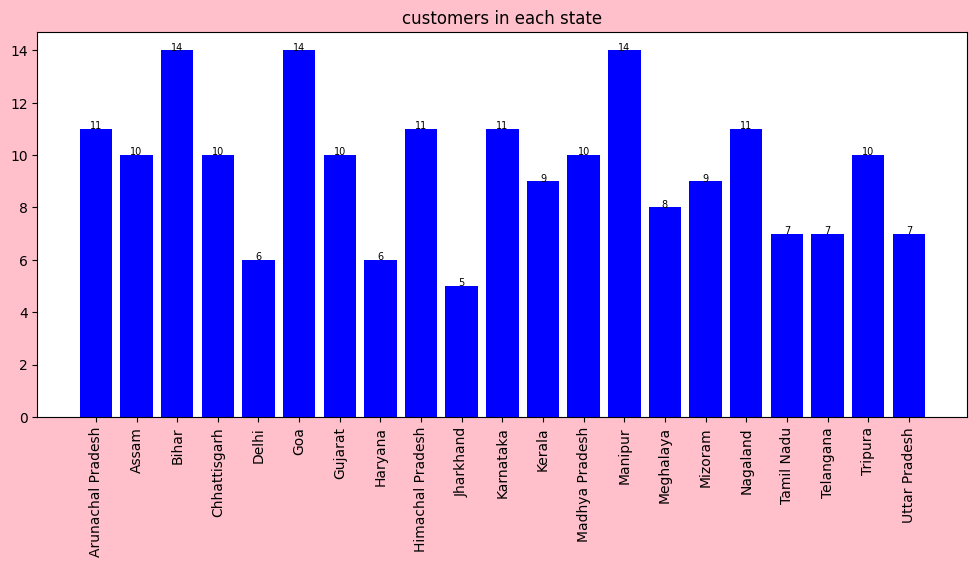

In [50]:

plt.figure(figsize=(12,5),facecolor='pink')
plt.title('customers in each state')
plt.bar(x_val2,height=y_val2,color='blue')


for i in range(len(df['state'])):
    plt.annotate(xy=(i,df['number_customers'].values[i]),
                 text = df['number_customers'].values[i],
                 horizontalalignment='center',size=7)



plt.xticks(rotation=90)
plt.show()

#8. What is the average quantity of each product sold?

In [51]:
query = """SELECT Subcatname, AVG(unitprice) AS avg_quantity_sold
FROM subcategories
GROUP BY subcatname
limit 10 ;"""
df = queryToDataFrame(query)

In [52]:
df.head()

,Subcatname,avg_quantity_sold
0,Smartphones,9599.000000
1,Laptops,88216.000000
2,Smartwatches,63444.000000
3,Wireless headphones,63946.000000
4,Portable power banks,34847.000000


In [53]:
x_val3 = df['Subcatname'].values

In [54]:
y_val3 = df['avg_quantity_sold'].values

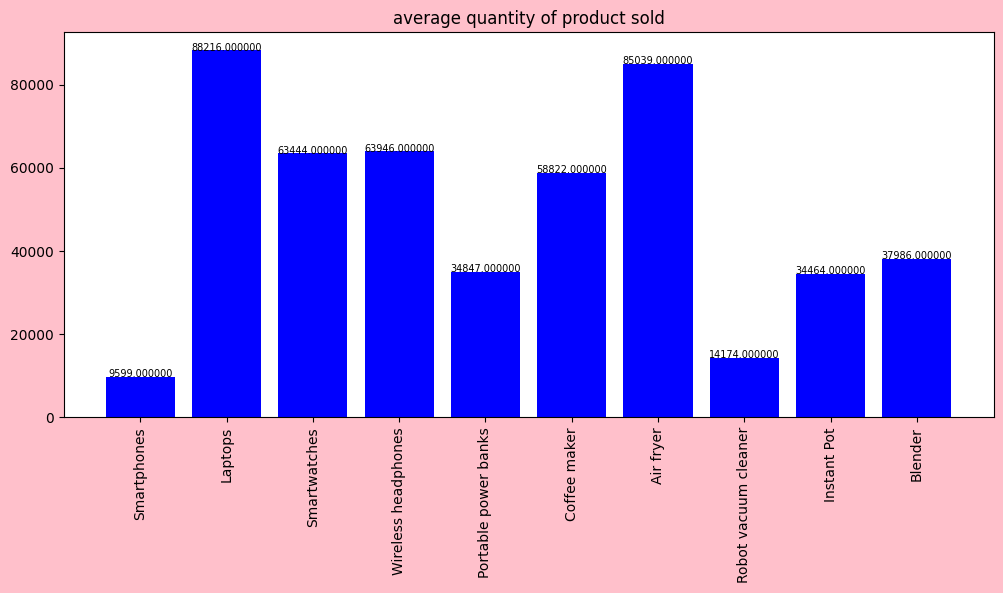

In [55]:

plt.figure(figsize=(12,5),facecolor='pink')
plt.title('average quantity of product sold')
plt.bar(x_val3,height=y_val3,color='blue')


for i in range(len(df['Subcatname'])):
    plt.annotate(xy=(i,df['avg_quantity_sold'].values[i]),
                 text = df['avg_quantity_sold'].values[i],
                 horizontalalignment='center',size=7)



plt.xticks(rotation=90)
plt.show()

#9Which supplier has the highest total sales?

In [56]:
query = """SELECT sup.SupplierName, SUM(p.UnitPrice * s.Quantity) AS TotalSales
FROM salesdata s
JOIN subcategories p ON s.subcatID = p.SubcatID
JOIN suppliers sup ON p.SupplierID = sup.SupplierID
GROUP BY sup.SupplierID
ORDER BY TotalSales DESC
LIMIT 1;
"""
supplier_highest_sales = queryToDataFrame(query)

In [57]:
supplier_highest_sales

,SupplierName,TotalSales
0,Dora-Aggarwal,180265340.00


#10 What is the total revenue generated from sales in each state?

In [58]:
query = """SELECT state, SUM(TotalPrice) AS total_revenue
FROM salesdata sd 
join customers c on sd.CustomerID = c.CustomerID
GROUP BY state;"""
df = queryToDataFrame(query)

In [59]:
df.head()

,state,total_revenue
0,Assam,91371978.00
1,Tripura,92329290.00
2,Nagaland,91511008.00
3,Manipur,122908203.00
4,Kerala,84668321.00


assam has the highest total sales 

In [60]:
x_val4 = df['state'].values

In [61]:
y_val4 = df['total_revenue'].values

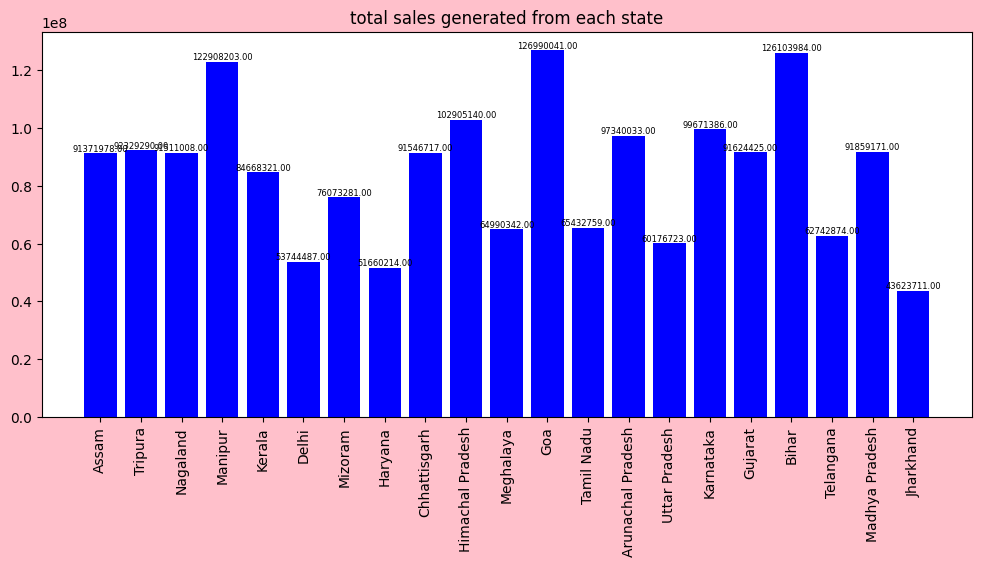

In [62]:

plt.figure(figsize=(12,5),facecolor='pink')
plt.title('total sales generated from each state')
plt.bar(x_val4,height=y_val4,color='blue')

for i in range(len(x_val4)):
    plt.text(x=i, y=y_val4[i], s=y_val4[i], ha='center', va='bottom', fontsize=6)


plt.xticks(rotation=90)
plt.show()

#11How many sales were made by each customer

In [63]:
query = """SELECT CustomerID, COUNT(*) AS total_sales
FROM salesdata
GROUP BY CustomerID;
"""
df = queryToDataFrame(query)

In [64]:
df

,CustomerID,total_sales
0,C-2023-100-1,66
1,C-2023-100-10,71
2,C-2023-100-100,61
3,C-2023-100-101,74
4,C-2023-100-102,63
...,...,...
195,C-2023-100-95,56
196,C-2023-100-96,69
197,C-2023-100-97,67
198,C-2023-100-98,57


#12What is the total salary expenditure on employees in each department

In [65]:
query = """SELECT Department, SUM(Salary) AS TotalSalaryExpenditure
FROM Employees
GROUP BY Department;"""
df = queryToDataFrame(query)

In [66]:
df.head()

,Department,TotalSalaryExpenditure
0,Marketing,469413.37
1,Legal,577095.43
2,Accounts,445848.85
3,Logistics,365835.92
4,Sales,325662.92


In [67]:
x_val5 = df['Department'].values

In [68]:
y_val5 = df['TotalSalaryExpenditure'].values

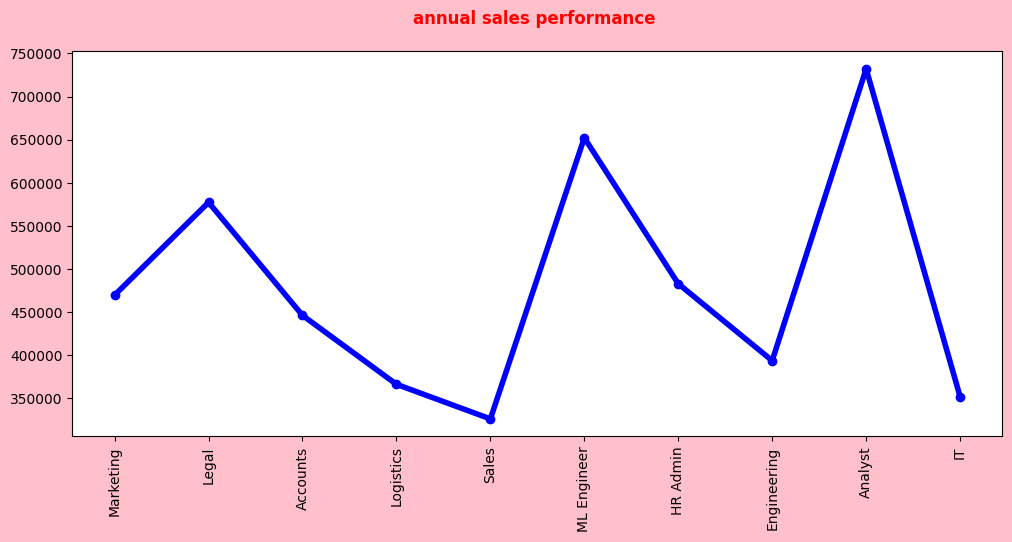

In [69]:
plt.figure(figsize=(12,5),facecolor='pink')
plt.title('annual sales performance ',color= 'red',pad=20,fontweight='bold')
plt.plot(x_val5,y_val5,
         linestyle='solid',
       linewidth=4,
        color='blue',marker='o')


    

#plt.legend
plt.xticks(rotation=90)
plt.show()

#13. Which subcategory has the highest average unit price?

In [70]:
query = """SELECT Subcatname, AVG(UnitPrice) AS AverageUnitPrice
FROM subcategories
GROUP BY Subcatname
ORDER BY AverageUnitPrice DESC
LIMIT 3;
"""

df = queryToDataFrame(query)

In [71]:
df

,Subcatname,AverageUnitPrice
0,Pet beds,94029.000000
1,Laptops,88216.000000
2,Air fryer,85039.000000


In [72]:
x_val6 = df['Subcatname'].values

In [73]:
y_val6 =  df['AverageUnitPrice'].values

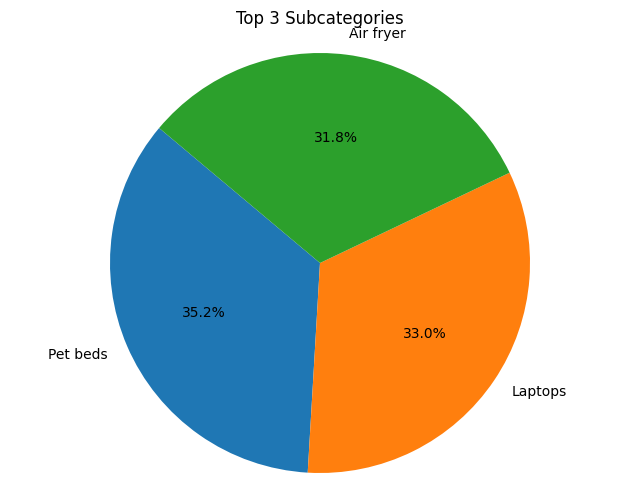

In [74]:

plt.figure(figsize=(8, 6))
plt.pie(y_val6, labels=x_val6, autopct='%1.1f%%', startangle=140)
plt.title('Top 3 Subcategories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


#14What is the total revenue generated from sales in each category?

In [75]:
query = """SELECT c.CategoryName, SUM(s.Quantity * p.UnitPrice) AS TotalRevenue
FROM salesdata s
JOIN subcategories p ON s.SubcatID = p.SubcatID
JOIN categories c ON p.CategoryID = c.CategoryID
GROUP BY c.CategoryName;"""

df = queryToDataFrame(query)


In [76]:
df 

,CategoryName,TotalRevenue
0,Electronics and Gadgets,319374417.00
1,Home and Kitchen Appliances,269316684.00
2,Outdoor and Sports Equipment,231074739.00
3,Health and Wellness Products,324761329.00
4,Books and Educational Materials,282897933.00
5,Pet Supplies and Accessories,361848986.00
